In [1]:
from Utils.FS import file
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from scipy.sparse import coo_matrix, dok_matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sents = brown.sents()
sents = [[token.lower() for token in sent] for sent in sents]
words = brown.words()
words = [word.lower() for word in words]

In [3]:
print("Number of tokens: {}".format(len(words)))
print("Number of sentences: {}".format(len(sents)))
print("Longest sentences length: {}".format(max([len(sent) for sent in sents])))

Number of tokens: 1161192
Number of sentences: 57340
Longest sentences length: 180


In [4]:
def words2dicts(words):
    f_dict = {}
    index = 0
    for word in words:
        if not word in f_dict.keys():
            f_dict[word] = index
            index = index + 1
        
    return f_dict, { v:k for k, v in f_dict.items()}

#def sents2wordContextMatrix(sents):
    

In [5]:
words_dict, inv_words_dict = words2dicts(words)
words_size = len(words_dict)
print("Number of unique tokens: {}".format(words_size))

Number of unique tokens: 49815


In [6]:
def sents2wordContextMatrix(sents, words_dict, window = 5):
    m = coo_matrix((words_size, words_size), 'float64')
    
    print('Doing forward pass...')
    back = []
    row = []
    col = []
    data = []
    for sent in sents:
        for word in sent:
            row += [words_dict[word] for b in back]
            col += [words_dict[b] for b in back]
            data += [1 for b in back]
            if len(back) == window:
                back.pop(0)
            back.append(word)
    
    print('Doing backward pass...')
    back = []
    for sent in reversed(sents):
        for word in reversed(sent):
            row += [words_dict[word] for b in back]
            col += [words_dict[b] for b in back]
            data += [1 for b in back]
            if len(back) == window:
                back.pop(0)
            back.append(word)
    
    return coo_matrix((data, (row, col)), shape=(words_size, words_size), dtype='float64')

In [7]:
m = sents2wordContextMatrix(sents, words_dict, 15)

Doing forward pass...
Doing backward pass...


In [8]:
norm_m = normalize(m, norm='l2', axis=1, copy=True, return_norm=False)

In [9]:
u, s, vt = svds(m, k=100)

In [20]:
word_vec = norm_m.dot(u)
word_vec = word_vec.dot(np.diag(s))
print(word_vec.shape)

(49815, 100)


In [11]:
def plotVocabs(vocabs):
    vectors = np.array([ word_vec[words_dict[vocab]] for vocab in vocabs])
    coo = coo_matrix(vectors)
    print(coo.shape)
    v, s, vt = svds(coo, k=2)
    print(v.shape)
    print(vt.shape)
    red = coo.dot(vt.T)
    print(red)
    x = [red[i][0] for i,vocab in enumerate(vocabs)]
    y = [red[i][1] for i,vocab in enumerate(vocabs)]
    return x, y

In [29]:
vocabs = ['man', 'woman', 'boy', 'girl', 'king', 'queen']
#x, y = plotVocabs(vocabs)
x = [word_vec[words_dict[vocab]][::-1][0] for vocab in vocabs]
y = [word_vec[words_dict[vocab]][::-1][1] for vocab in vocabs]

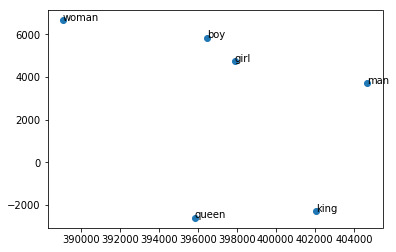

In [30]:
plt.scatter(x, y)
for i, name in enumerate(vocabs):
    plt.annotate(name, (x[i],y[i]))
plt.autoscale(True, True, True)
plt.show()

In [44]:
arr = np.array([[1, 1], [1, 1]])

In [45]:
u2,s2,v2 = np.linalg.svd(arr)

In [46]:
np.matmul(arr, u2)

array([[-1.41421356,  0.        ],
       [-1.41421356,  0.        ]])

In [47]:
np.matmul(u2, np.matmul(np.diag(s2), np.matmul(u2, [[1], [1]])))

array([[ 2.],
       [ 2.]])

In [39]:
arr

array([[1, 1],
       [0, 1]])